In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')


In [6]:
# read classifier result
key = '1d_precip_location_final1' # not v9 but retrained tuned models 
rname = 'results/classifier_outcomes_%s.csv' % key
outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)

In [24]:
# read benchmark
bm_matrix = pd.read_csv('results/benchmark_matrix_precip_apples.csv', index_col=0, parse_dates=True)
GEFS9_0 = bm_matrix['GEFS_0_0.90']
gefs = pd.read_csv('results/benchmark_matrix_precip_apples.csv', index_col=0, parse_dates=True)

#### confusion matrix 2*2

In [8]:
# create confusion matrix for outcome matrix at all quantiles
# create ROC matrix for outcome as well - points
binary_outcomes = outcomes.copy() # here outcomes is for test period
for col in binary_outcomes.columns[1:]:
    if binary_outcomes[col].dtypes == 'float64':
        binary_outcomes[col] = (binary_outcomes[col]> 0.5)

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
# points = pd.DataFrame(index=leads)
con_matrix = pd.DataFrame(outcomes['ERA5']) #'ERA5'
models=['CNN','MLP']
for m in models:
    for q in quantiles:
#         points['%s_%0.2f_TPR' % (m, q)] = leads
#         points['%s_%0.2f_FPR' % (m, q)] = leads
        for l in leads:
            label = binary_outcomes['ERA5_%0.2f' % q] #'ERA5'
            pred =  binary_outcomes['%s_%d_%0.2f' % (m, l, q)]
            TP = (label&pred)
            con_matrix['%s_%d_%0.2f_TP' % (m, l, q)] = TP
            TN = (~label&~pred)
            con_matrix['%s_%d_%0.2f_TN' % (m, l, q)] = TN
            FP = (~label&pred)
            con_matrix['%s_%d_%0.2f_FP' % (m, l, q)] = FP
            FN = (label&~pred)
            con_matrix['%s_%d_%0.2f_FN' % (m, l, q)] = FN
#             # TP rate = TP/TP+FN
#             TPR = np.sum(TP)/(np.sum(TP)+np.sum(FN))
#             # FP rate = FP/FP+TN
#             FPR = np.sum(FP)/(np.sum(FP)+np.sum(TN))
#             points.loc[l,'%s_%0.2f_TPR' % (m, q)] = TPR
#             points.loc[l,'%s_%0.2f_FPR' % (m, q)] = FPR

#### confusion matrix 2*2*2

In [9]:
leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]

def create_con_matrix_vs_benchmark(key):
    rname = 'results/classifier_outcomes_%s.csv' % key
    outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
    binary_outcomes = outcomes.copy()
    for col in outcomes.columns[1:]:
        if outcomes[col].dtypes == 'float64':
            binary_outcomes[col] = (outcomes[col]> 0.5)


    con_precip_vs = pd.DataFrame(bm_matrix['ERA5']) #'ERA5'

    for q in quantiles:
        for l in leads:
            label = bm_matrix['ERA5_%0.2f' % q] #'ERA5'
            bm_pred =  bm_matrix['GEFS_%d_%0.2f' % (l, q)]
            m_pred = pred =  binary_outcomes['CNN_%d_%0.2f' % (l, q)] # this draws from stored variable - binary_outcomes 
            con_precip_vs['VS_%d_%0.2f_PPN' % (l, q)] = (label&m_pred&~bm_pred) # corrected wrong bm_pred
            con_precip_vs['VS_%d_%0.2f_NNP' % (l, q)] = (~label&~m_pred&bm_pred) # corrected wrong bm_pred
            con_precip_vs['VS_%d_%0.2f_PNP' % (l, q)] = (label&~m_pred&bm_pred ) # changed good bm_pred to incorrect because of FN
            con_precip_vs['VS_%d_%0.2f_NPN' % (l, q)] = (~label&m_pred&~bm_pred) # change good bm_pred to incorrect because of FP
            con_precip_vs['VS_%d_%0.2f_PNN' % (l, q)] = (label&~m_pred&~bm_pred) # unchanged bad pred
            con_precip_vs['VS_%d_%0.2f_NPP' % (l, q)] = (~label&m_pred&bm_pred) # unchanged bad pred
            con_precip_vs['VS_%d_%0.2f_NNN' % (l, q)] = (~label&~m_pred&~bm_pred) # good as always
            con_precip_vs['VS_%d_%0.2f_PPP' % (l, q)] = (label&m_pred&bm_pred) # good as always
            
    return con_precip_vs

In [17]:
con_precip_vs = create_con_matrix_vs_benchmark('1d_precip_location_final1')

### Generate plots

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
cmap1 = sns.cubehelix_palette(start=.5, rot=-.5, hue=1.1, light=1, dark=0.2, as_cmap=True)
# sns.cubehelix_palette(start=0.5, rot=-.75, hue=1.3, dark=0.25, reverse=True, as_cmap=True)

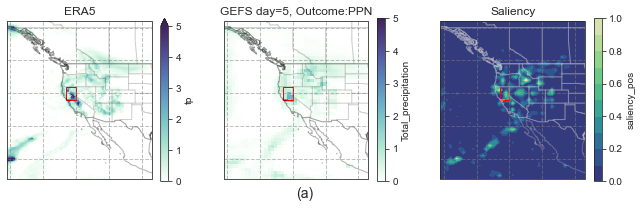

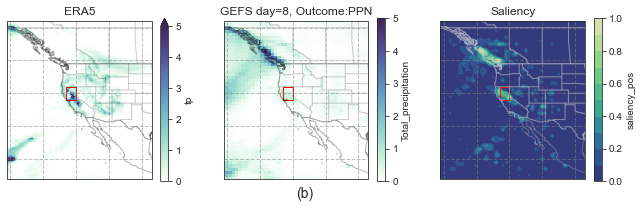

In [89]:
plt.rcParams['figure.figsize'] = [11, 3]


quantile = 0.90
lead = 4
date = '2019-12-08'
visualize_spatial_day(q=quantile, l=lead, d=date, ptype='pos saliency', label='a')
plt.savefig('/final_figures/9_1.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/9_1.png')
plt.show()
lead = 7
visualize_spatial_day(q=quantile, l=lead, d=date, ptype='pos saliency', label='b')
plt.savefig('/final_figures/9_2.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/9_2.png')
plt.show()

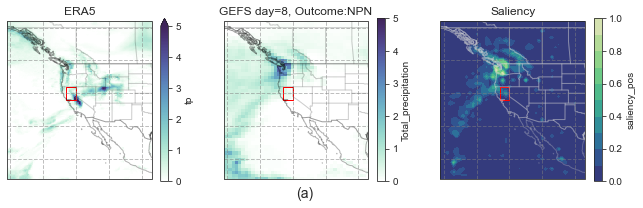

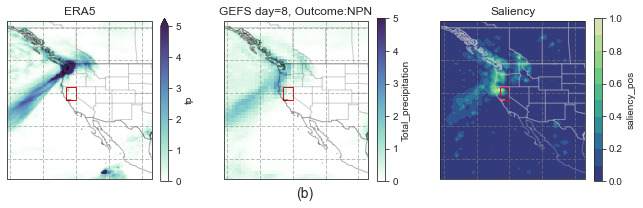

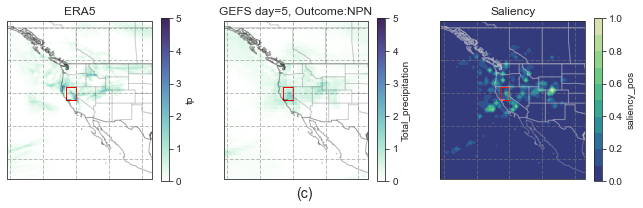

In [90]:
plt.rcParams['figure.figsize'] = [11, 3]


quantile = 0.90
lead = 7
date = '2017-11-17'
visualize_spatial_day(q=quantile, l=lead, d=date, ptype='pos saliency', label='a')
plt.savefig('/final_figures/10_1.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/10_1.png')
plt.show()

lead = 7
date = '2019-12-20'
visualize_spatial_day(q=quantile, l=lead, d=date, ptype='pos saliency', label='b')
plt.savefig('/final_figures/10_2.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/10_2.png')
plt.show()

lead = 4
date = '2017-02-22'
visualize_spatial_day(q=quantile, l=lead, d=date, ptype='pos saliency', label='c')
plt.savefig('/final_figures/10_3.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/10_3.png')
plt.show()

### Functions for plots

In [11]:
import numpy as np 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import pickle
import datetime as dt

In [12]:

def is_NDJFM(month):
  return (month >= 11) | (month <= 3)

def time_mask(ds):
  return (is_NDJFM(ds['time.month']) & 
         (ds['time.year'] >= 2011) & # test period
         (ds['time.year'] <= 2019)) 

In [13]:

def is_NDJFM_2(month):
  return (month >= 10) | (month <= 3)

def time_mask_2(ds):
  return (is_NDJFM_2(ds['time.month']) & 
         (ds['time.year'] >= 2010) & # test period
         (ds['time.year'] <= 2019)) 

In [14]:
def map_format(ax):
    # ax.add_feature(cartopy.feature.LAND, color='0.2')
    # ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.3)
    ax.add_feature(cartopy.feature.COASTLINE, linestyle='-', alpha=0.3)
    ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=0.1)

    ax.set_extent([-141,-97,14,62], crs=geo)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = False
    # gl.xformatter = LONGITUDE_FORMATTER
    # gl.yformatter = LATITUDE_FORMATTER
    ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                    edgecolor='r',
                                    facecolor='none',
                                    linewidth=1,
                                    transform=ccrs.PlateCarree()))
    return ax

In [15]:
def map_format_light(ax):
    # ax.add_feature(cartopy.feature.LAND, color='0.2')
    # ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', color='lightgray', alpha=0.3)
    ax.add_feature(cartopy.feature.COASTLINE, linestyle='-', color='lightgray', alpha=0.3)
    ax.add_feature(cartopy.feature.STATES, linestyle='-', edgecolor='lightgray', alpha=0.3)

    ax.set_extent([-141,-97,14,62], crs=geo)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = False
    # gl.xformatter = LONGITUDE_FORMATTER
    # gl.yformatter = LATITUDE_FORMATTER
    ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                    edgecolor='r',
                                    facecolor='none',
                                    linewidth=1,
                                    transform=ccrs.PlateCarree()))
    return ax

In [19]:
geo = ccrs.PlateCarree()

In [1]:
import seaborn as sns

cmap2 = sns.cubehelix_palette(start=0.5, rot=-.75, hue=1.3, dark=0.25, reverse=True, as_cmap=True)



In [83]:
def visualize_spatial_day(q, l, d, ptype='saliency', max1=5, max2=5, label='a'):
    
    
#   find out categories
    mask = (con_precip_vs.loc[d]==True)
    categories = con_precip_vs.loc[d, mask].filter(regex='%0.2f' % q ).index
    text = [cat_name[-3:] for cat_name in categories]
    
#   get apples
    apples = pd.read_csv('results/apples.csv', index_col=0)
    
#   get saliency
    exp_final_file = 'results/explanation_precip_location_final1/exp_CNN_%0.2f_%d.nc' % (q, l)
    exp_final = xr.open_dataset(exp_final_file)   
    
    path = 'data/'
    gefs_file = 'gefs/WCUS/gefs_merged.nc'
    pr_gefs = xr.open_dataset(path + gefs_file).Total_precipitation
    fhour = str(pr_gefs.fhour[l].values)
    # adjust date so that we are looking for previous days for forecasts of date of interest
    datetime_object = dt.datetime.strptime(d, '%Y-%m-%d')
    datetime_object = datetime_object + dt.timedelta(days=-l)
    #dt.datetime.strftime(datetime_object,'%Y-%m-%d')
    pr = pr_gefs.sel(time=datetime_object.strftime('%Y-%m-%d'), fhour=fhour)
    
    # read and extract era 5 file
    path = 'data/era/'
    year = d[:4]
    ds = xr.open_dataset(path + 'era5_daily_target_precip_NCA_%s.nc' % year)
    ds = ds.tp.sel(time=d)*100
    
    fig=plt.figure()

#     ax = map_format(plt.subplot(1,5,1, projection=geo))
    ax = map_format(fig.add_subplot(1,3,1, projection=geo))
#    ds.plot(ax=ax, transform=geo, vmin=0, vmax=np.max(ds.values.flatten()), cmap='PuBuGn')
    ds.plot(ax=ax, transform=geo, vmin=0, vmax=max1, cmap=cmap1)

    plt.title("ERA5")

#     ax = map_format(plt.subplot(1,5,2, projection=geo))
    ax = map_format(fig.add_subplot(1,3,2, projection=geo))
#    pr.plot(ax=ax, transform=geo, vmin=0, vmax=np.max(pr.values.flatten()), cmap='PuBuGn')
    pr.plot(ax=ax, transform=geo, vmin=0, vmax=max2, cmap=cmap1)
    plt.title("GEFS day=%d, Outcome:%s" % (l+1,text[l]))

    #     ax = map_format(plt.subplot(1,5,3, projection=geo))
    ax = map_format_light(fig.add_subplot(1,3,3, projection=geo))
    
    if ptype == 'saliency':
        sal_final = exp_final.saliency.sel(time=d)
    elif ptype == 'pos saliency':
        sal_final = exp_final.saliency_pos.sel(time=d)
    else:
        sal_final = exp_final.saliency_neg.sel(time=d)

    sal_final.plot.contourf(ax=ax,cmap=cmap2,levels=11) #, cbar_kwargs=dict(shrink=0.8)) # lead time = 0
    plt.title("Saliency")


    fig.suptitle('(%s)' %label, y = 0.1, fontsize=14) 
#     q_value = apples.loc[l, str(q)]
#     era_value = gefs.loc[d, 'ERA5']
#     gefs_value = gefs.loc[d,('GEFS_VAL_%d' % l)]
#     if q == 0.90:
#         era_q_value = 1.3849
#     if q == 0.95:
#         era_q_value = 2.0847
#     fig.suptitle("date=%s, era_q_value: %.4f, era_value: %.4f, gefs_value: %.4f, gefs_q_value: %.4f\n, max day: %.2f, avg of sal: %.6f, soft max: %.4f" 
#              %(d, era_q_value, era_value, gefs_value, q_value, np.max(ds.values.flatten()), sal_final.mean().values, outcomes.loc[d, ('CNN_%d_%.2f' %(l, q))]),
#             y = 1.01) 

#     ax = map_format(plt.subplot(1,5,4, projection=geo))
#     sal_v10 = exp_v10.saliency.sel(time=d)
#     sal_v10.plot(ax=ax, transform=geo, cmap='Greens')
#     plt.title("saliency v10")

    
#     ax = map_format(plt.subplot(1,5,5, projection=geo))
#     sal = exp.saliency.sel(time=d)
#     sal.plot(ax=ax, transform=geo, cmap='Greens') 
#     plt.title("saliency newm")

    
#     q_value = np.quantile(bm_matrix['ERA5'], q)
#     era_value = bm_matrix.loc[date, 'ERA5']
#     gefs_value = bm_matrix.loc[date,('GEFS_VAL_%d' % lead)]     

#     print('max day',np.max(ds.values.flatten()))
#     print('average of saliency: ', sal_final.mean().values)
#     print('soft max: ', outcomes.loc[date, ('CNN_%d_%.2f' %(l, q))])

In [29]:
cmap1